# **ВОПРОС 1**

In [1]:
import numpy as np
import random
import time

#создать 2 пустые массива произвольного размера
arrSize = 1000000
arrA = np.zeros(arrSize)
arrB = np.zeros(arrSize)

#добовить любые числа
for i in range(arrSize):
    arrA[i] = random.randint(0,100)
    arrB[i] = random.randint(0,100)

#стандартные списков
t1Start = time.perf_counter() #начать отсчет времени с текущего момента
mul = [a*b for a, b in zip(arrA, arrB)] #выполннить умножение
t1Stop = time.perf_counter() - t1Start #время процесса

#Numpy
t2Start = time.perf_counter()
mulNum = np.multiply(arrA,arrB)
t2Stop = time.perf_counter() - t2Start
#
print("время выполнения операции поэлементного перемножения стандартных списков :",t1Stop, "\n" "время выполнения операции массивов NumPy:", t2Stop)

ModuleNotFoundError: No module named 'numpy'

# **ВОПРОС 2**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('data2.csv')
chloramines = data['Chloramines']
print(chloramines)

0       5.246382
1       6.183110
2       8.677789
3       8.146643
4       7.512608
          ...   
7181    9.689175
7182    9.264883
7183    9.297300
7184    6.580460
7185    5.216369
Name: Chloramines, Length: 7186, dtype: float64


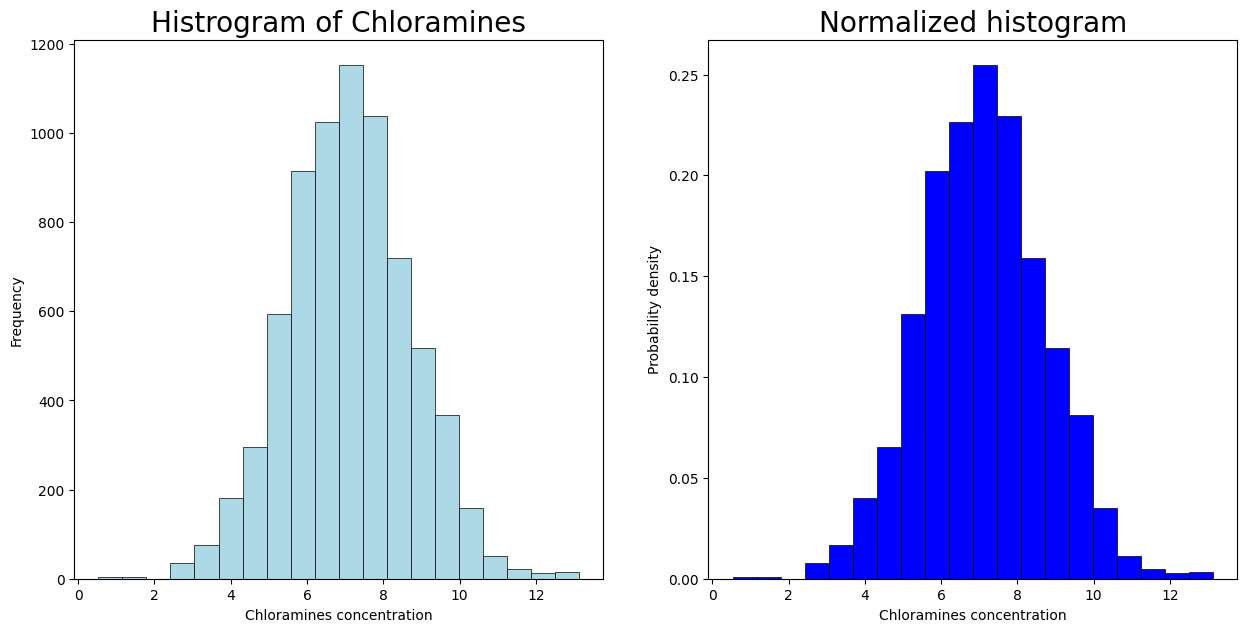

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize =(15,7))
plt.style.use('fivethirtyeight')

#Строить гистограмму
ax1.hist(chloramines, bins = 20, color='lightblue', edgecolor='black')
ax1.set(xlabel='Chloramines concentration',
         ylabel='Frequency',
         title='Histrogram of Chloramines')
         
#Строить нормализованную гистограмму 
ax2.hist(chloramines, density=True, bins=20, color='blue', edgecolor='black')
ax2.set(xlabel='Chloramines concentration',
        ylabel='Probability density',
        title='Normalized histogram')
plt.show();


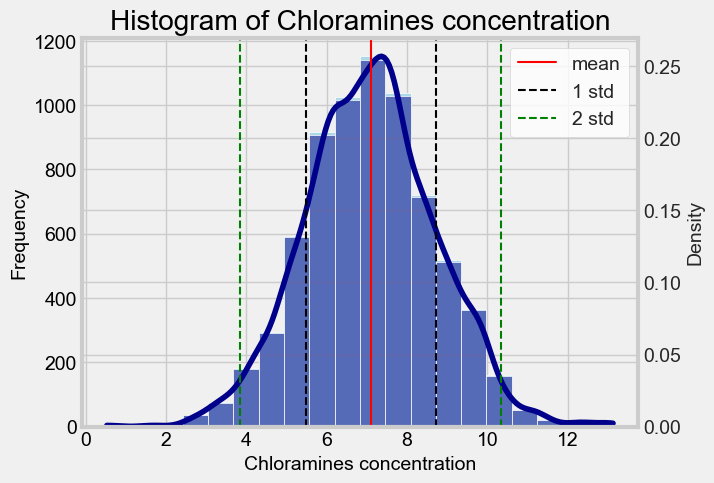

In [ ]:
fig, ax3 = plt.subplots()
sns.set_style('whitegrid')

ax3.hist(chloramines, bins=20, color='lightblue')
ax3.set(xlabel='Chloramines concentration',
        ylabel='Frequency',
        title="Histogram of Chloramines concentration")
ax4 = ax3.twinx()

#строить Стандартизированную графику
sns.histplot(x=chloramines, bins=20, kde=True, color='darkblue', stat='density')

#Рассчитайте среднее значение и среднеквадратичное отклонение данных
mean = np.mean(chloramines)
std_dev = np.std(chloramines)

plt.axvline(mean, color='r',linewidth=1.5, label='mean')
plt.axvline(mean + std_dev, color='k', linestyle='dashed',linewidth=1.5, label='1 std')
plt.axvline(mean - std_dev, color='k', linestyle='dashed', linewidth=1.5)
plt.axvline(mean + 2*std_dev, color='g', linestyle='dashed',linewidth=1.5, label='2 std')
plt.axvline(mean - 2*std_dev, color='g', linestyle='dashed', linewidth=1.5)
plt.legend();
plt.show()

# **ВОПРОС 3**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('TkAgg')

def func(x):
    y = np.cos(x)
    z = x / np.sin(x)
    return y, z

x = np.linspace(-3*np.pi, 3*np.pi, 500)
y, z = func(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()



# **ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ**

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots()

def graph (frames):
    x = np.linspace(0, 2*np.pi, 500)
    y = np.sin(x + 0.1*frames)
    ax.clear()
    ax.plot(x, y)

ani = FuncAnimation(fig, graph, frames=500, interval=50) #create graph - take graph - number of frames = 500 - appearence each frame = 50/ms
writer = PillowWriter(fps=20) #frames per second
ani.save('y(x)=sin(x).gif', writer=writer)
